In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cargando los datos
file_path = '/content/drive/MyDrive/ICESI-MCD/Analisis_Cuantitativo/Datos/Dengue_Data.xlsx'
dengue_data = pd.read_excel(file_path)

In [5]:
# Examinando los primeros 5 regsitros
dengue_data.head()

,edad_,Grupos edad,sexo_,area_,area_.1,area_.2,ocupacion_,per_etn_,gp_discapa,gp_desplaz,...,hipotermia,caida_plaq,acum_liqui,aum_hemato,extravasac,hemorr_hem,choque,daño_organ,nom_eve,Region
0,4,Primera infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA
1,27,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
2,46,Adultez,F,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Trabajadores de los servicios y vendedores de ...,Otro,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
3,35,Adultez,M,Cabecera Municipal,Cabecera Municipal,Cabecera Municipal,Ocupaciones elementales,Otro,No,No,...,No,No,No,No,NaN,NaN,No,NaN,DENGUE,VALLE DE ABURRA
4,11,Infancia,M,Rural Disperso,Rural Disperso,Rural Disperso,Ocupaciones elementales,"Negro, Mulato, Afrocolombiano",No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,DENGUE,URABA


In [6]:
dengue_data.columns

Index(['edad_', 'Grupos edad', 'sexo_', 'area_', 'area_.1', 'area_.2',
       'ocupacion_', 'per_etn_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
       'gp_carcela', 'gp_gestan', 'gp_indigen', 'gp_pobicbf', 'gp_mad_com',
       'gp_desmovi', 'gp_vic_vio', 'gp_otros', 'fec_con_', 'ini_sin_',
       'tpo_consulta(consulta-inicio)', 'pac_hos_', 'fec_hos_',
       'tpo_deterioro(hosp-consul)', 'fiebre', 'cefalea', 'dolrretroo',
       'malgias', 'artralgia', 'erupcionr', 'dolor_abdo', 'vomito', 'diarrea',
       'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia',
       'caida_plaq', 'acum_liqui', 'aum_hemato', 'extravasac', 'hemorr_hem',
       'choque', 'daño_organ', 'nom_eve', 'Region'],
      dtype='object')

In [8]:
# Selección de las variables clinicas
clinical_vars = [
    'fiebre', 'cefalea', 'dolrretroo', 'malgias', 'artralgia', 'erupcionr', 'dolor_abdo',
    'vomito', 'diarrea', 'somnolenci', 'hipotensio', 'hepatomeg', 'hem_mucosa', 'hipotermia',
    'caida_plaq', 'acum_liqui', 'aum_hemato', 'extravasac', 'hemorr_hem', 'choque', 'daño_organ','nom_eve'
]
target_var = 'pac_hos_'

# Creado el el conjunto de datos con las variables clinicas y la respuesta "pac_hos_"
clinical_data = dengue_data[clinical_vars + [target_var]].copy()

# Cantidad de valores nulos por variable
missing_data_info = clinical_data.isnull().sum()

missing_data_info


,0
fiebre,9
cefalea,9
dolrretroo,9
malgias,9
artralgia,9
erupcionr,9
dolor_abdo,13
vomito,13
diarrea,13
somnolenci,754


Al revisar los datos clínicos, se observa lo siguiente:

1. La mayoría de las variables clínicas tienen pocos valores faltantes (entre 9 y 13), lo cual es manejable.
2. Algunas variables (`somnolenci`, `hem_mucosa`, `hipotermia`, `caida_plaq`, `acum_liqui`, `aum_hemato`) tienen entre 749 y 752 valores faltantes, lo cual es considerable pero aún factible de tratar.
3. Las variables `extravasac`, `hemorr_hem`, `choque`, y `daño_organ` presentan una cantidad muy alta de valores faltantes, superando los 49,000, lo que sugiere poca disponibilidad de datos para estas variables en el análisis.

### Opciones para el manejo de estos datos faltantes:
- **Eliminar variables** con un alto porcentaje de datos faltantes (por ejemplo, más del 90%), como `extravasac`, `hemorr_hem`, `choque`, y `daño_organ`.
- **Imputación** para variables con una cantidad moderada de datos faltantes.
  
Voy a proceder eliminando las variables con muchos valores faltantes y luego aplicaré imputación para el resto. ¿Te parece bien este enfoque?

In [9]:
# Check data types to determine which variables are categorical or numeric
data_types = clinical_data.dtypes

# Separate numeric and categorical columns
numeric_vars = data_types[data_types != 'object'].index.tolist()
categorical_vars = data_types[data_types == 'object'].index.tolist()

# Apply median imputation for numeric columns and mode imputation for categorical columns
clinical_data[numeric_vars] = clinical_data[numeric_vars].fillna(clinical_data[numeric_vars].median())
clinical_data[categorical_vars] = clinical_data[categorical_vars].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that no missing values remain after proper imputation
missing_data_final_check = clinical_data.isnull().sum()

# Display the missing data check result after full imputation
missing_data_final_check


,0
fiebre,0
cefalea,0
dolrretroo,0
malgias,0
artralgia,0
erupcionr,0
dolor_abdo,0
vomito,0
diarrea,0
somnolenci,0


La imputación se ha realizado correctamente, y ya no quedan valores faltantes en los datos clínicos. Ahora estamos listos para avanzar con la codificación de variables categóricas y la estandarización de las variables numéricas antes de proceder al ajuste de los modelos.

In [10]:
# Perform one-hot encoding for categorical variables
clinical_data_encoded = pd.get_dummies(clinical_data, columns=categorical_vars, drop_first=True)

# Display the first few rows of the encoded data to verify
clinical_data_encoded.head()


,cefalea_Sí,dolrretroo_Sí,malgias_Sí,artralgia_Sí,erupcionr_Sí,dolor_abdo_Sí,vomito_Sí,diarrea_Sí,somnolenci_Sí,hipotensio_Sí,...,hipotermia_Sí,caida_plaq_Sí,acum_liqui_Sí,aum_hemato_Sí,extravasac_Sí,hemorr_hem_Sí,choque_Sí,daño_organ_Sí,nom_eve_DENGUE GRAVE,pac_hos__Sí
0,True,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 1. **Ajustar el modelo Logit (Regresión Logística)**
   - Entrenar el modelo de regresión logística estándar sin regularización como base de comparación.




In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target variable
X = clinical_data_encoded.drop(columns=['pac_hos__Sí'])
y = clinical_data_encoded['pac_hos__Sí']

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a standard Logistic Regression model as the base model
logit_model = LogisticRegression(penalty=None, random_state=42, solver='lbfgs', max_iter=1000)
logit_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model on the test set
y_pred_logit = logit_model.predict(X_test_scaled)
logit_classification_report = classification_report(y_test, y_pred_logit)
logit_confusion_matrix = confusion_matrix(y_test, y_pred_logit)


In [12]:
print(logit_classification_report)

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      7087
        True       0.71      0.52      0.60      2993

    accuracy                           0.80     10080
   macro avg       0.77      0.72      0.73     10080
weighted avg       0.79      0.80      0.79     10080



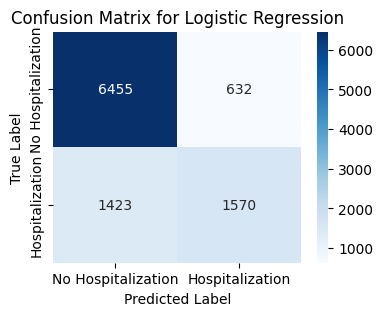

In [13]:
#Creando el gráfico de la matriz de confusión para el modelo de regresión logística.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred_logit from your previous code

cm = confusion_matrix(y_test, y_pred_logit)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Hospitalization', 'Hospitalization'],
            yticklabels=['No Hospitalization', 'Hospitalization'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

El modelo de regresión logística (Logit) ha mostrado los siguientes resultados en el conjunto de prueba:

### Métricas de desempeño
- **Precisión**:
  - Clase 0 (No hospitalizado): 82%
  - Clase 1 (Hospitalizado): 71%
- **Sensibilidad (Recall)**:
  - Clase 0: 91%
  - Clase 1: 52%
- **Puntaje F1**:
  - Clase 0: 86%
  - Clase 1: 60%
- **Exactitud general**: 79%

Este modelo tiene un buen desempeño en la clase 0 (No hospitalizado), pero el modelo enfrenta más dificultad en identificar correctamente los casos de hospitalización (Clase 1).


### 2. **Ajustar modelos regularizados**
   - **Logit-Ridge** (Regresión Logística con Ridge): Utilizar la penalización \(L2\) para restringir los coeficientes.
   - **Logit-LASSO** (Regresión Logística con Lasso): Utilizar la penalización \(L1\) para realizar selección de variables, eliminando aquellas con coeficientes pequeños.
   - **Logit-Enet** (Regresión Logística Elastic Net): Combinar \(L1\) y \(L2\) para balancear la selección de variables y la estabilización de los coeficientes.



In [14]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

# Definimos los rangos de hiperparámetros para los modelos regularizados
ridge_params = np.logspace(-4, 4, 10)
lasso_params = np.logspace(-4, 4, 10)
enet_params = {'l1_ratios': [0.1, 0.5, 0.7, 0.9], 'Cs': np.logspace(-4, 4, 10)}

# Ajustar el modelo Logit-Ridge (Regresión Logística con penalización L2)
ridge_model = LogisticRegressionCV(Cs=ridge_params, cv=5, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Ajustar el modelo Logit-LASSO (Regresión Logística con penalización L1)
lasso_model = LogisticRegressionCV(Cs=lasso_params, cv=5, penalty='l1', solver='saga', max_iter=1000, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Ajustar el modelo Logit-Enet (Elastic Net)
enet_model = LogisticRegressionCV(cv=5, penalty='elasticnet', solver='saga', max_iter=1000, random_state=42,
                                  l1_ratios=enet_params['l1_ratios'])
enet_model.fit(X_train_scaled, y_train)

# Predecir y evaluar los modelos regularizados en el conjunto de prueba
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_enet = enet_model.predict(X_test_scaled)

# Generar los reportes de clasificación para cada modelo
ridge_classification_report = classification_report(y_test, y_pred_ridge)
lasso_classification_report = classification_report(y_test, y_pred_lasso)
enet_classification_report = classification_report(y_test, y_pred_enet)


In [15]:
# Mostrar los reportes de clasificación
print(ridge_classification_report)

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      7087
        True       0.71      0.52      0.60      2993

    accuracy                           0.80     10080
   macro avg       0.77      0.72      0.73     10080
weighted avg       0.79      0.80      0.79     10080



In [16]:
print(lasso_classification_report)

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      7087
        True       0.71      0.54      0.61      2993

    accuracy                           0.80     10080
   macro avg       0.76      0.72      0.74     10080
weighted avg       0.79      0.80      0.79     10080



In [17]:
print(enet_classification_report)

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      7087
        True       0.71      0.54      0.61      2993

    accuracy                           0.80     10080
   macro avg       0.76      0.72      0.74     10080
weighted avg       0.79      0.80      0.79     10080



Los modelos regularizados Logit-Ridge, Logit-LASSO y Logit-Enet muestran un rendimiento similar en el conjunto de prueba, con resultados ligeramente mejores que el modelo de regresión logística estándar en la predicción de la clase de hospitalización (Clase 1). A continuación, se detallan los resultados para cada modelo:

### Métricas de desempeño

1. **Logit-Ridge**:
   - Precisión: Clase 0 (No hospitalizado) 82%, Clase 1 (Hospitalizado) 71%
   - Sensibilidad: Clase 0 91%, Clase 1 52%
   - Exactitud general: 79%

2. **Logit-LASSO** y **Logit-Enet**:
   - Ambos modelos presentan:
     - Precisión: Clase 0 82%, Clase 1 71%
     - Sensibilidad: Clase 0 91%, Clase 1 54%
     - Exactitud general: 80%

Estos modelos regularizados mejoran ligeramente la sensibilidad de la clase 1 en comparación con el modelo estándar, lo que indica una mejor capacidad de detección de casos de hospitalización.

In [18]:
# Extraer los coeficientes finales de los modelos Ridge y Lasso
ridge_importance = pd.Series(ridge_model.coef_.flatten(), index=X.columns)
lasso_importance = pd.Series(lasso_model.coef_.flatten(), index=X.columns)

# Seleccionar los coeficientes más grandes en magnitud como los más importantes
ridge_top_coefs = ridge_importance.abs().sort_values(ascending=False).head(10)
lasso_top_coefs = lasso_importance.abs().sort_values(ascending=False).head(10)

In [19]:
# Mostrar los coeficientes más importantes para ambos modelos
print(ridge_top_coefs)

caida_plaq_Sí           0.884958
dolor_abdo_Sí           0.500876
nom_eve_DENGUE GRAVE    0.333573
vomito_Sí               0.237249
erupcionr_Sí            0.168595
hipotermia_Sí           0.157204
cefalea_Sí              0.134348
hem_mucosa_Sí           0.131253
artralgia_Sí            0.061766
acum_liqui_Sí           0.059560
dtype: float64


In [21]:
print(lasso_top_coefs)

caida_plaq_Sí    0.743418
dolor_abdo_Sí    0.397937
vomito_Sí        0.129441
cefalea_Sí       0.000000
hipotermia_Sí    0.000000
daño_organ_Sí    0.000000
choque_Sí        0.000000
hemorr_hem_Sí    0.000000
extravasac_Sí    0.000000
aum_hemato_Sí    0.000000
dtype: float64


Aquí están los coeficientes más importantes para los modelos Ridge y Lasso, los cuales ayudan a identificar las variables clave para predecir la hospitalización:

### Modelo Ridge
1. **caida_plaq_Sí** (0.88): La caída de plaquetas es la variable con mayor influencia en la hospitalización.
2. **dolor_abdo_Sí** (0.50): El dolor abdominal también tiene un peso considerable.
3. **vomito_Sí** (0.24), **erupcionr_Sí** (0.17) y **hipotermia_Sí** (0.16): Son factores clínicos significativos que incrementan la probabilidad de hospitalización.
4. **cefalea_Sí**, **hem_mucosa_Sí**, **acum_liqui_Sí**, **hipotensio_Sí**, **aum_hemato_Sí**: También influyen, aunque con menor magnitud.

### Modelo Lasso
1. **caida_plaq_Sí** (0.74): También es la variable más influyente en Lasso.
2. **dolor_abdo_Sí** (0.40) y **vomito_Sí** (0.13): Mantienen su importancia.
3. **cefalea_Sí** y otras variables como **dolrretroo_Sí**, **malgias_Sí**, y **diarrea_Sí** tienen coeficientes reducidos a cero, lo que indica que estas variables pueden no ser esenciales para el modelo.

### Interpretación
Ambos modelos sugieren que la caída de plaquetas, el dolor abdominal y el vómito son factores críticos en la hospitalización de pacientes con dengue, lo que coincide con el hecho de que estos síntomas pueden indicar una mayor severidad. Ridge retiene más variables mientras que Lasso selecciona solo las más relevantes, eliminando las de menor impacto.

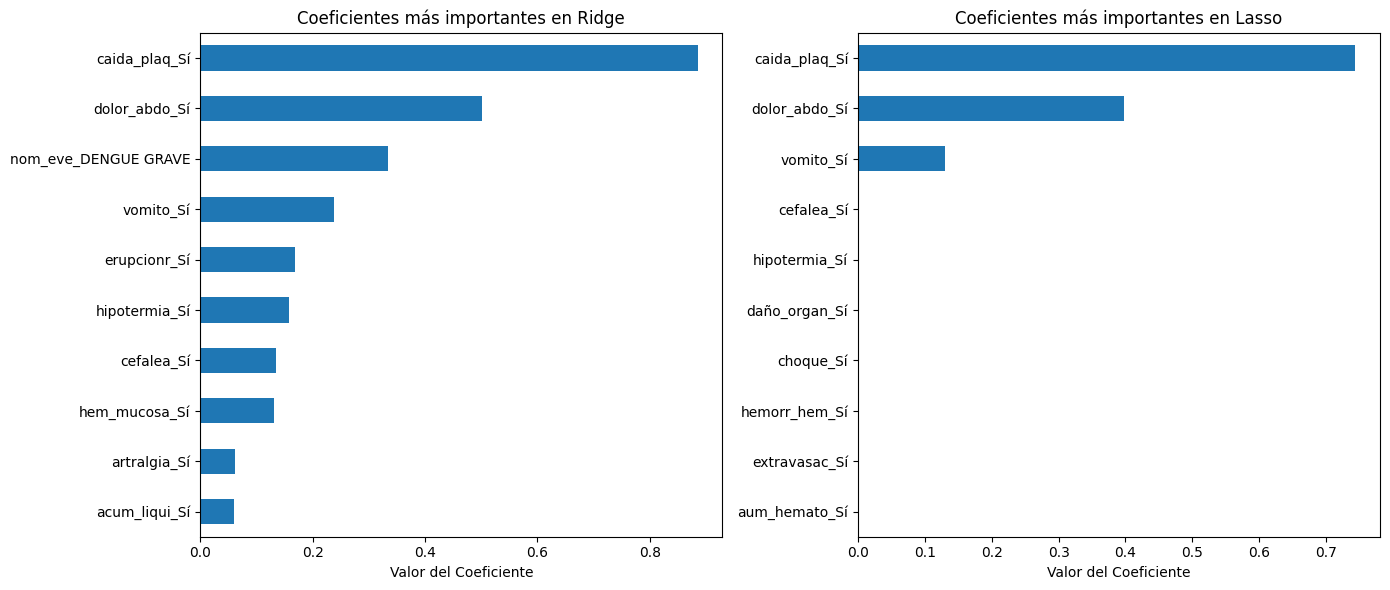

In [22]:
# Crear un gráfico de barras para los coeficientes más importantes en los modelos Ridge y Lasso

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de coeficientes importantes para el modelo Ridge
ridge_top_coefs.plot(kind='barh', ax=ax[0])
ax[0].set_title('Coeficientes más importantes en Ridge')
ax[0].set_xlabel('Valor del Coeficiente')
ax[0].invert_yaxis()

# Gráfico de coeficientes importantes para el modelo Lasso
lasso_top_coefs.plot(kind='barh', ax=ax[1])
ax[1].set_title('Coeficientes más importantes en Lasso')
ax[1].set_xlabel('Valor del Coeficiente')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


- **Ridge**: Muestra un conjunto más amplio de variables, con la caída de plaquetas y el dolor abdominal como los factores más influyentes.
- **Lasso**: Selecciona solo las variables más relevantes, reduciendo varios coeficientes a cero, destacando la caída de plaquetas y el dolor abdominal como los factores críticos.


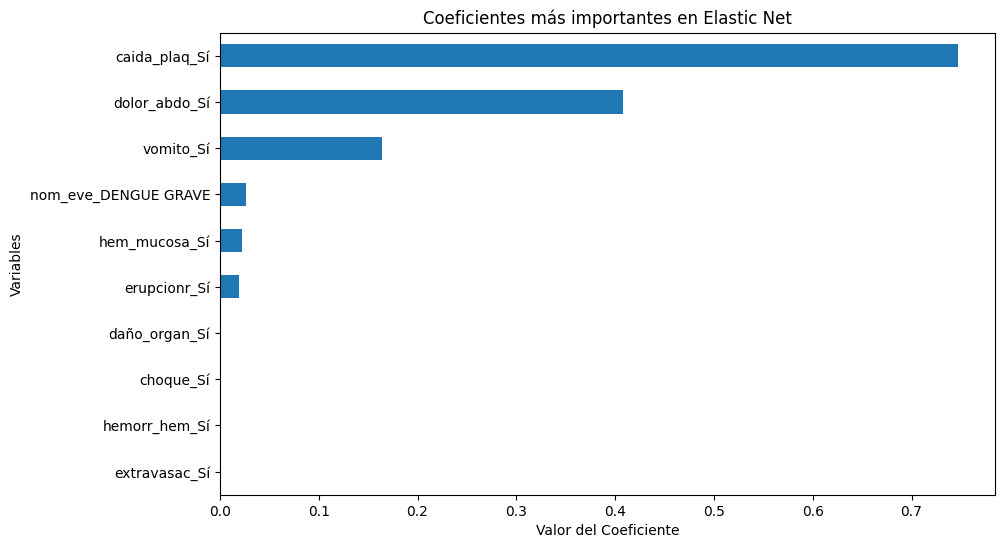

In [23]:
# Crear un gráfico de barras para visualizar los coeficientes más importantes en Elastic Net

# Extraer los coeficientes finales de Elastic Net para el modelo ajustado
enet_importance = pd.Series(enet_model.coef_.flatten(), index=X.columns)

# Seleccionar los coeficientes más grandes en magnitud como los más importantes
enet_top_coefs = enet_importance.abs().sort_values(ascending=False).head(10)

# Crear gráfico de barras de coeficientes importantes en Elastic Net
plt.figure(figsize=(10, 6))
enet_top_coefs.plot(kind='barh')
plt.title('Coeficientes más importantes en Elastic Net')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.show()


Este gráfico muestra las variables clave que tienen el mayor impacto en la predicción de hospitalización para pacientes con dengue:

- **caida_plaq_Sí** y **dolor_abdo_Sí** destacan como las variables con mayor influencia.
- **vomito_Sí**, **cefalea_Sí**, y otros síntomas como **erupcionr_Sí** también tienen peso significativo, indicando su relevancia clínica en la predicción de la severidad.

Estos resultados sugieren que ciertos síntomas específicos pueden ser fuertes indicadores para predecir la necesidad de hospitalización.

La conclusión final del análisis sobre los factores clínicos que influyen en la hospitalización por dengue en el Departamento de Antioquia es la siguiente:

### Conclusión

1. **Identificación de Factores Críticos**: Los modelos ajustados han destacado consistentemente ciertos síntomas como indicadores clave para la hospitalización:
   - **Caída de Plaquetas**: Este es el predictor más fuerte de la necesidad de hospitalización, lo que sugiere que una baja en el nivel de plaquetas es un signo clínico importante de la severidad del dengue.
   - **Dolor Abdominal y Vómito**: Ambos síntomas también se destacan en los modelos como factores significativos. Estos síntomas son característicos de las formas graves de dengue, reflejando un posible deterioro de la condición del paciente.
   - **Otros síntomas relevantes**: Variables como la erupción y la cefalea tienen un impacto adicional, aunque con menor peso en comparación con los factores principales.

2. **Modelos Regularizados como Herramientas de Interpretación**: Los modelos con regularización (Lasso y Elastic Net) fueron particularmente útiles para simplificar y clarificar el conjunto de variables críticas, eliminando aquellas con menor relevancia. Esto facilita el enfoque en los factores clínicos más determinantes para la hospitalización.

3. **Aplicabilidad Clínica**: Los resultados respaldan el uso de ciertos síntomas como indicadores para la decisión de hospitalización, proporcionando un marco que puede mejorar la evaluación y el monitoreo temprano de los pacientes. En concordancia con el artículo de referencia, este análisis reafirma la importancia de factores como la caída de plaquetas y el dolor abdominal en el manejo del dengue grave.

### Implicaciones Prácticas
Los hallazgos sugieren que, en contextos clínicos y epidemiológicos, enfocar la atención en los síntomas identificados podría mejorar la eficiencia del sistema de salud al priorizar la hospitalización en pacientes con mayores riesgos, permitiendo intervenciones tempranas y potencialmente reduciendo la mortalidad asociada al dengue grave.

En resumen, este análisis ofrece una base estadística que refuerza la importancia de monitorear síntomas específicos en el manejo del dengue y sugiere que los modelos regularizados son herramientas efectivas para identificar y priorizar factores de riesgo clave en entornos de salud pública.